In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import sklearn
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

## Pretty variable display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## RANDOM STATE
seed=3

In [13]:
df = pd.read_csv('../bballref_data/pca99_slim_2000_to_2020.csv', index_col=0)
df.shape
df.head()

(6541, 29)

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24,pc_25,pc_26,pc_27,pc_28
player,,,,,,,,,,,,,,,,,,,,,
Tariq Abdul-Wahad 2000,1.626979,0.454694,-2.965712,-0.600392,-1.475508,0.649638,0.635552,0.305775,0.215783,0.122277,...,0.208864,-0.209962,-0.061814,0.313172,0.073928,0.299092,0.343417,-0.065723,0.621040,-0.088582
Shareef Abdur-Rahim 2000,2.737949,4.532473,-0.163336,-0.653016,-1.243238,-0.235618,1.736338,-1.155636,1.010312,-1.444513,...,0.150086,0.578265,0.070424,-0.641589,0.031936,-0.325305,0.533966,0.439595,0.117740,-0.045508
Ray Allen 2000,-1.733061,6.088027,0.509840,-0.804976,-0.607920,-1.252576,0.388607,-0.118343,-0.109407,-0.081444,...,0.409525,0.484536,0.004095,0.542165,0.589421,-0.333793,0.800323,0.414920,-0.169004,0.091181
John Amaechi 2000,2.794025,1.088067,-3.686525,-1.237389,-0.247942,-0.553035,1.444166,-0.328258,-0.613034,0.414337,...,-0.307314,0.043251,0.027019,0.992424,-1.025021,-0.136192,-0.222238,-0.185810,-0.279236,0.668147
Derek Anderson 2000,-1.397427,3.081621,-1.660180,-0.056190,0.672981,-0.706050,1.128798,0.851434,-0.176939,-0.378583,...,-0.163052,0.306686,0.295048,0.000120,0.126745,-0.248198,0.240927,-0.062671,0.440254,-0.252608


In [14]:
df['pc_0'].sort_values()

player
Damon Jones 2008         -7.625142
Dee Brown 2000           -6.982841
Jason Terry 2018         -6.903950
Damon Jones 2006         -6.886633
Steve Kerr 2001          -6.816578
                           ...    
Shaquille O'Neal 2001    10.638361
DeAndre Jordan 2016      10.681439
Shaquille O'Neal 2006    10.700161
Shaquille O'Neal 2002    10.727679
Shaquille O'Neal 2005    10.951969
Name: pc_0, Length: 6541, dtype: float64

## Determine number of clusters (AIC, BIC, Silouette Score)

Wall time: 2min 2s


Text(0.5, 0, 'Number components')

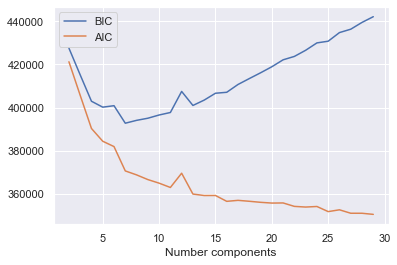

In [12]:
%%time

range_n_components = np.arange(2,30)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=seed).fit(df) for n in range_n_components]
plt.plot(range_n_components, [model.bic(df) for model in models], label='BIC')
plt.plot(range_n_components, [model.aic(df) for model in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number components')

Wall time: 25.3 s


Text(0.5, 1.0, 'Silhouette Sore')

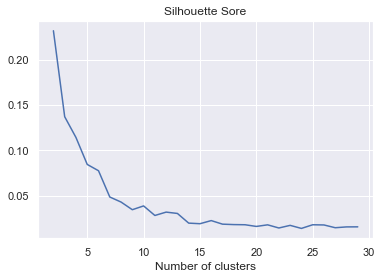

In [13]:
%%time
## Evaluate silhoutte score for each model
labels = {n: model.predict(df) for n, model in zip(range_n_components, models)}
silhoutte_scores = [silhouette_score(df, labels[n], random_state=seed) for n in range_n_components]
plt.plot(range_n_components, silhoutte_scores)
plt.xlabel('Number of clusters')
plt.title('Silhouette Sore');

## Build GMM, cluster

In [ ]:
GaussianMixture?

In [15]:
%%time
n_comps = 12

gmm = GaussianMixture(n_components=n_comps, covariance_type='full', max_iter=10_000, n_init=8, random_state=seed)
gmm.fit(df)

hard_labels = gmm.predict(df)
soft_labels = gmm.predict_proba(df)
df_clusters = pd.DataFrame(hard_labels, index=df.index, columns=['label'])
soft_cols = [f'cluster_{n}' for n in range(gmm.n_components)]
df_clusters[soft_cols] = soft_labels
df_clusters = df_clusters.round(6)  ## for better visual
df_clusters.head()

Wall time: 22.3 s


,label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11
player,,,,,,,,,,,,,
Tariq Abdul-Wahad 2000,8,0.000000,0.000001,0.000001,0.000000,0.0,0.0,0.007414,0.0,0.760366,0.000000,0.232218,0.0
Shareef Abdur-Rahim 2000,2,0.000000,0.000000,0.999987,0.000011,0.0,0.0,0.000000,0.0,0.000002,0.000000,0.000000,0.0
Ray Allen 2000,3,0.000000,0.000000,0.000000,0.999204,0.0,0.0,0.000000,0.0,0.000000,0.000796,0.000000,0.0
John Amaechi 2000,8,0.018299,0.000000,0.000002,0.000000,0.0,0.0,0.000000,0.0,0.981615,0.000000,0.000085,0.0
Derek Anderson 2000,6,0.000000,0.000034,0.000000,0.000000,0.0,0.0,0.999915,0.0,0.000000,0.000000,0.000051,0.0


In [16]:
# 12 clusters, n_init=8, max_iter=10_000
df_clusters['label'].value_counts()

7     1001
1      852
11     703
8      672
3      635
6      635
5      604
10     403
0      327
9      326
2      241
4      142
Name: label, dtype: int64

In [26]:
# 12 clusters, n_init=8, max_iter=10_000
df_clusters['label'].value_counts()

6     958
1     911
2     864
11    631
4     627
7     573
3     478
5     458
0     440
8     228
9     201
10    172
Name: label, dtype: int64

In [17]:
# 11 clusters, n_init=8, max_iter=10_000
df_clusters['label'].value_counts()

0     963
1     911
2     861
4     721
8     678
7     490
6     482
9     460
3     418
10    313
5     244
Name: label, dtype: int64

In [16]:
## 10 clusters, n_init=8, max_iter=10000
df_clusters['label'].value_counts()

2    1079
4     834
6     808
1     743
3     702
5     602
8     591
9     546
0     356
7     280
Name: label, dtype: int64

In [21]:
## 14 clusters, n_init=8, max_iter=10000
df_clusters['label'].value_counts()

3     836
4     798
2     657
0     621
6     563
9     482
10    437
8     434
5     408
13    396
1     301
7     249
11    206
12    153
Name: label, dtype: int64

In [ ]:
## 8 clusters, n_init=5, max_iter=10000
df_clusters['label'].value_counts()

In [ ]:
## 12 clusters, n_init=10, max_iter=10000
df_clusters['label'].value_counts()

In [ ]:
## 11 clusters, n_init=5, max_iter=1000
df_clusters['label'].value_counts()

In [ ]:
## 10 clusters, n_init=5, max_iter=1000
df_clusters['label'].value_counts()

In [ ]:
## 12 clusters, n_init=5, max_iter=1000
df_clusters['label'].value_counts()

In [ ]:
## 11 clusters, n_init=5, max_iter=1000
df_clusters['label'].value_counts()

### Look at clusters

In [17]:
## Sample each cluster

for n in range(0,gmm.n_components):
    print('label:', n, 'total:', len(df_clusters[df_clusters['label']==n]))
    print(df_clusters[df_clusters['label']==n].sample(20)[['label', f'cluster_{n}']])
    print('\n')

label: 0 total: 327
                       label  cluster_0
player                                 
Danny Fortson 2002         0   0.971702
Serge Ibaka 2010           0   0.999740
Carlos Rogers 2000         0   0.998955
Anderson Varejão 2014      0   1.000000
Carlos Boozer 2004         0   0.977295
Jerome Williams 2000       0   0.999965
J.J. Hickson 2015          0   0.999444
Robin Lopez 2017           0   1.000000
Malik Rose 2003            0   0.999885
Enes Kanter 2020           0   0.999830
Thomas Robinson 2014       0   1.000000
Robert Traylor 2002        0   0.999985
Elton Brand 2001           0   1.000000
Francisco Elson 2009       0   0.999901
Stromile Swift 2003        0   0.999085
Brian Grant 2002           0   1.000000
Johnny O'Bryant 2016       0   0.936072
Michael Doleac 2001        0   0.903229
Robert Traylor 2001        0   0.988329
Darrell Arthur 2011        0   0.999998


label: 1 total: 852
                        label  cluster_1
player                               

In [18]:
## with n clusters = 18
players  = [
            'Chris Paul',
            'Steve Nash',
            'Tony Parker',
            'Jamal Crawford',
            'Lou Williams',
            'Goran Dragic'
            'Kobe Bryant',
            'LeBron James',
            'Paul Pierce',
            'Dirk',
            'Kobe',
            'Yao',
            'Chris Webber'
            "Shaquille O'Neal",
            'Dwight Howard',
            'Roy Hibbert',
            'Marcus Smart',
            'Jae Crowder'
            'Draymond Green',
            'Stephen Curry',
            'Klay Thompson',
            'Eddie House',
            'Peja',
            'Rashard Lewis'
            'Jameer Nelson',
            'Ray Allen',
            'Kevin Garnett',
            'Deandre Jordan',
            'Paul George',
            'James Harden',
            'Giannis',
            'Buddy Hield',
            'Kemba Walker',
            'Lamarcus',
            'Bradley Beal',
            'Russel Westbrook',
            'Kyrie Irving',
            'John Wall',
            'James Posey',
            'Hedo',
            'Gerald Green',
            'Ricky Davis',
            'Antoine Walker',
            'Duncan Robinson',
            'Rashard Lewis',
            'J.R. Smith',
            'Jae Crowder',
            'Robert Covington'
           ]
    
for player in players:
    print(df_clusters[df_clusters.index.str.contains(player)]['label'])

player
Chris Paul 2006    3
Chris Paul 2007    3
Chris Paul 2008    9
Chris Paul 2009    9
Chris Paul 2010    3
Chris Paul 2011    3
Chris Paul 2012    3
Chris Paul 2013    3
Chris Paul 2014    3
Chris Paul 2015    3
Chris Paul 2016    3
Chris Paul 2017    3
Chris Paul 2018    3
Chris Paul 2019    3
Chris Paul 2020    3
Name: label, dtype: int64
player
Steve Nash 2000    5
Steve Nash 2001    3
Steve Nash 2002    3
Steve Nash 2003    3
Steve Nash 2004    3
Steve Nash 2005    3
Steve Nash 2006    3
Steve Nash 2007    3
Steve Nash 2008    3
Steve Nash 2009    3
Steve Nash 2010    3
Steve Nash 2011    3
Steve Nash 2012    3
Steve Nash 2013    5
Name: label, dtype: int64
player
Tony Parker 2002     5
Tony Parker 2003     3
Tony Parker 2004     3
Tony Parker 2005     3
Tony Parker 2006     3
Tony Parker 2007     3
Tony Parker 2008     3
Tony Parker 2009     3
Tony Parker 2010    10
Tony Parker 2011     3
Tony Parker 2012     3
Tony Parker 2013     3
Tony Parker 2014     3
Tony Parker 2015   

In [20]:
df_multi_clusters = df_clusters[(df_clusters.iloc[:, 1:] < 0.9).all(axis=1)]
df_multi_clusters.shape
df_multi_clusters.sample(15)

(861, 13)

,label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11
player,,,,,,,,,,,,,
Paul Pierce 2004,9,0.0,0.000000,0.0,0.202431,0.0,0.000000,0.000201,0.0,0.000000,0.797368,0.000000,0.000000
Tony Battie 2009,10,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.370166,0.000000,0.629834,0.000000
Dennis Scott 2000,11,0.0,0.325316,0.0,0.000000,0.0,0.000041,0.000015,0.0,0.000000,0.000000,0.000000,0.674629
Bobby Portis 2017,8,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.682273,0.000000,0.000001,0.317726
Royal Ivey 2008,1,0.0,0.605915,0.0,0.000000,0.0,0.014296,0.000587,0.0,0.000101,0.000000,0.000567,0.378535
Hedo Türkoğlu 2007,6,0.0,0.000000,0.0,0.000790,0.0,0.000000,0.811173,0.0,0.000014,0.188022,0.000000,0.000000
Vince Carter 2018,11,0.0,0.362337,0.0,0.000000,0.0,0.000000,0.022372,0.0,0.001022,0.000000,0.000000,0.614269
Boris Diaw 2005,10,0.0,0.000147,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.055801,0.000000,0.836468,0.107584
Arron Afflalo 2015,1,0.0,0.867181,0.0,0.000000,0.0,0.001310,0.131486,0.0,0.000023,0.000000,0.000000,0.000000


## Write out `df_clusters` and Combined DF with `clean_rate`

In [21]:
df_clusters.to_csv('../bballref_data/gmm_clusters12_slim.csv')

In [23]:
df_clusters = pd.read_csv('../bballref_data/gmm_clusters12_slim.csv', index_col=0)
df_clean_rates = pd.read_csv('../bballref_data/clean_rates_1997_to_2020.csv', index_col=0)
df_clean_rates = df_clean_rates[df_clean_rates['year'] >= 2000]

df = df_clean_rates.merge(df_clusters, left_index=True, right_index=True)
# df.to_csv('../bballref_data/clusters12_slim_all_clean_data_2000_to_2020.csv')

## Add BPM Weighted combonents

In [24]:
cluster_cols = [f'cluster_{n}' for n in range(12)]
bpm_cluster_cols = [f'cluster_{n}_bpm' for n in range(12)]
df[bpm_cluster_cols] = df[cluster_cols].multiply(df['bpm'], axis='index')

In [25]:
df[cluster_cols+bpm_cluster_cols+['bpm']].head()

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,...,cluster_3_bpm,cluster_4_bpm,cluster_5_bpm,cluster_6_bpm,cluster_7_bpm,cluster_8_bpm,cluster_9_bpm,cluster_10_bpm,cluster_11_bpm,bpm
player,,,,,,,,,,,,,,,,,,,,,
Tariq Abdul-Wahad 2000,0.000000,0.000001,0.000001,0.000000,0.0,0.0,0.007414,0.0,0.760366,0.000000,...,-0.000000,-0.0,-0.0,-0.008897,-0.0,-0.912439,-0.000000,-0.278662,-0.0,-1.2
Shareef Abdur-Rahim 2000,0.000000,0.000000,0.999987,0.000011,0.0,0.0,0.000000,0.0,0.000002,0.000000,...,0.000024,0.0,0.0,0.000000,0.0,0.000004,0.000000,0.000000,0.0,2.2
Ray Allen 2000,0.000000,0.000000,0.000000,0.999204,0.0,0.0,0.000000,0.0,0.000000,0.000796,...,3.597134,0.0,0.0,0.000000,0.0,0.000000,0.002866,0.000000,0.0,3.6
John Amaechi 2000,0.018299,0.000000,0.000002,0.000000,0.0,0.0,0.000000,0.0,0.981615,0.000000,...,-0.000000,-0.0,-0.0,-0.000000,-0.0,-2.454038,-0.000000,-0.000212,-0.0,-2.5
Derek Anderson 2000,0.000000,0.000034,0.000000,0.000000,0.0,0.0,0.999915,0.0,0.000000,0.000000,...,-0.000000,-0.0,-0.0,-0.099992,-0.0,-0.000000,-0.000000,-0.000005,-0.0,-0.1


In [27]:
df.to_csv('../bballref_data/bpm_clusters12_all_data.csv')

In [28]:
sorted(df.columns)

['age',
 'and1s_per_min',
 'ast_pct',
 'ast_per_poss',
 'astd_pts_per_min',
 'avg_dist',
 'blk_pct',
 'blk_per_poss',
 'bpm',
 'cluster_0',
 'cluster_0_bpm',
 'cluster_1',
 'cluster_10',
 'cluster_10_bpm',
 'cluster_11',
 'cluster_11_bpm',
 'cluster_1_bpm',
 'cluster_2',
 'cluster_2_bpm',
 'cluster_3',
 'cluster_3_bpm',
 'cluster_4',
 'cluster_4_bpm',
 'cluster_5',
 'cluster_5_bpm',
 'cluster_6',
 'cluster_6_bpm',
 'cluster_7',
 'cluster_7_bpm',
 'cluster_8',
 'cluster_8_bpm',
 'cluster_9',
 'cluster_9_bpm',
 'dbpm',
 'def_rtg',
 'drawn_shooting_per_min',
 'drb_pct',
 'drb_per_poss',
 'dws',
 'fg2_pct',
 'fg2_per_poss',
 'fg2a_per_poss',
 'fg3_heave',
 'fg3_pct',
 'fg3_per_poss',
 'fg3a_heave',
 'fg3a_per_fga_pct',
 'fg3a_per_poss',
 'fg_dunk_per_min',
 'fg_pct',
 'fg_pct_00_03',
 'fg_pct_03_10',
 'fg_pct_10_16',
 'fg_pct_16_xx',
 'fg_pct_corner3',
 'fg_pct_fg2a',
 'fg_pct_fg3a',
 'fg_per_poss',
 'fga_per_poss',
 'fouls_offensive_per_min',
 'fouls_shooting_per_min',
 'ft_pct',
 'ft_per